In [1]:
%env CUDA_VISIBLE_DEVICES = '-1'

In [53]:
import numpy as np
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense, LSTM, TimeDistributed, RepeatVector, Flatten
import matplotlib.pyplot as plt
colors = [i['color'] for i in list(plt.rcParams['axes.prop_cycle'])]

# LSTM範例

以下使用Keras建簡易的LSTM模型，包含四種模式：
- One to One
- One to Many
- Many to Many
- Many to One

此外，每種模式最後都會與Multiple Layer Perceptron做比較

## One to One

In [67]:
# X shape(sample, timesteps, features)
# y shape(sample, features)
X = np.array([i+ j for i in range(100) for j in range(1)]).reshape(100, 1, 1) / 100
y = np.arange(1, 101).reshape(-1, 1)
print('X:')
print(X[:3])
print(f'shape: {X.shape}')
print()
print('y:')
print(y[:3])
print(f'shape: {y.shape}')

X:
[[[0.  ]]

 [[0.01]]

 [[0.02]]]
shape: (100, 1, 1)

y:
[[1]
 [2]
 [3]]
shape: (100, 1)


### LSTM

In [86]:
model = Sequential()
model.add(LSTM(50, input_shape=(1, 1), return_sequences=True))  # input shape: (timesteps, features)
model.add(Flatten())
model.add(Dense(10, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X, y, epochs=1000, batch_size=16, verbose=1)
model.summary()

Epoch 1/1000
100/100 [==============================] - 2s 16ms/step - loss: 3380.8991
Epoch 2/1000
100/100 [==============================] - 0s 156us/step - loss: 3376.6110
Epoch 3/1000
100/100 [==============================] - 0s 313us/step - loss: 3372.6756
Epoch 4/1000
100/100 [==============================] - 0s 156us/step - loss: 3368.0770
Epoch 5/1000
100/100 [==============================] - 0s 312us/step - loss: 3363.3757
Epoch 6/1000
100/100 [==============================] - 0s 157us/step - loss: 3357.9820
Epoch 7/1000
100/100 [==============================] - 0s 156us/step - loss: 3351.8260
Epoch 8/1000
100/100 [==============================] - 0s 156us/step - loss: 3344.9943
Epoch 9/1000
100/100 [==============================] - 0s 313us/step - loss: 3337.0844
Epoch 10/1000
100/100 [==============================] - 0s 156us/step - loss: 3328.0472
Epoch 11/1000
100/100 [==============================] - 0s 312us/step - loss: 3317.7437
Epoch 12/1000
100/100 [========

100/100 [==============================] - 0s 156us/step - loss: 260.6001
Epoch 94/1000
100/100 [==============================] - 0s 156us/step - loss: 257.3489
Epoch 95/1000
100/100 [==============================] - 0s 156us/step - loss: 254.1317
Epoch 96/1000
100/100 [==============================] - 0s 0us/step - loss: 250.9164
Epoch 97/1000
100/100 [==============================] - 0s 0us/step - loss: 247.7276
Epoch 98/1000
100/100 [==============================] - 0s 156us/step - loss: 244.4786
Epoch 99/1000
100/100 [==============================] - 0s 156us/step - loss: 241.2817
Epoch 100/1000
100/100 [==============================] - 0s 156us/step - loss: 237.9945
Epoch 101/1000
100/100 [==============================] - 0s 0us/step - loss: 234.5792
Epoch 102/1000
100/100 [==============================] - 0s 156us/step - loss: 231.3288
Epoch 103/1000
100/100 [==============================] - 0s 156us/step - loss: 228.2009
Epoch 104/1000
100/100 [========================

100/100 [==============================] - 0s 0us/step - loss: 15.1130
Epoch 187/1000
100/100 [==============================] - 0s 156us/step - loss: 14.2576
Epoch 188/1000
100/100 [==============================] - 0s 156us/step - loss: 13.4150
Epoch 189/1000
100/100 [==============================] - 0s 156us/step - loss: 12.6176
Epoch 190/1000
100/100 [==============================] - 0s 156us/step - loss: 11.8291
Epoch 191/1000
100/100 [==============================] - 0s 0us/step - loss: 11.0689
Epoch 192/1000
100/100 [==============================] - 0s 156us/step - loss: 10.3671
Epoch 193/1000
100/100 [==============================] - 0s 156us/step - loss: 9.6918
Epoch 194/1000
100/100 [==============================] - 0s 156us/step - loss: 9.0832
Epoch 195/1000
100/100 [==============================] - 0s 156us/step - loss: 8.5005
Epoch 196/1000
100/100 [==============================] - 0s 0us/step - loss: 7.9664
Epoch 197/1000
100/100 [==============================] -

100/100 [==============================] - 0s 156us/step - loss: 0.2032
Epoch 281/1000
100/100 [==============================] - 0s 156us/step - loss: 0.2008
Epoch 282/1000
100/100 [==============================] - 0s 156us/step - loss: 0.1981
Epoch 283/1000
100/100 [==============================] - 0s 0us/step - loss: 0.1942
Epoch 284/1000
100/100 [==============================] - 0s 156us/step - loss: 0.1928
Epoch 285/1000
100/100 [==============================] - 0s 156us/step - loss: 0.1916
Epoch 286/1000
100/100 [==============================] - 0s 156us/step - loss: 0.1871
Epoch 287/1000
100/100 [==============================] - 0s 156us/step - loss: 0.1842
Epoch 288/1000
100/100 [==============================] - 0s 0us/step - loss: 0.1816
Epoch 289/1000
100/100 [==============================] - 0s 156us/step - loss: 0.1786
Epoch 290/1000
100/100 [==============================] - 0s 156us/step - loss: 0.1764
Epoch 291/1000
100/100 [==============================] - 0s 1

100/100 [==============================] - 0s 156us/step - loss: 0.0962
Epoch 375/1000
100/100 [==============================] - 0s 156us/step - loss: 0.0952
Epoch 376/1000
100/100 [==============================] - 0s 156us/step - loss: 0.0946
Epoch 377/1000
100/100 [==============================] - 0s 156us/step - loss: 0.0946
Epoch 378/1000
100/100 [==============================] - 0s 0us/step - loss: 0.0940
Epoch 379/1000
100/100 [==============================] - 0s 0us/step - loss: 0.0942
Epoch 380/1000
100/100 [==============================] - 0s 156us/step - loss: 0.0946
Epoch 381/1000
100/100 [==============================] - 0s 156us/step - loss: 0.0940
Epoch 382/1000
100/100 [==============================] - 0s 156us/step - loss: 0.0934
Epoch 383/1000
100/100 [==============================] - 0s 0us/step - loss: 0.0932
Epoch 384/1000
100/100 [==============================] - 0s 156us/step - loss: 0.0936
Epoch 385/1000
100/100 [==============================] - 0s 156

100/100 [==============================] - 0s 0us/step - loss: 0.0816
Epoch 469/1000
100/100 [==============================] - 0s 156us/step - loss: 0.0820
Epoch 470/1000
100/100 [==============================] - 0s 156us/step - loss: 0.0835
Epoch 471/1000
100/100 [==============================] - 0s 156us/step - loss: 0.0819
Epoch 472/1000
100/100 [==============================] - 0s 156us/step - loss: 0.0810
Epoch 473/1000
100/100 [==============================] - 0s 0us/step - loss: 0.0809
Epoch 474/1000
100/100 [==============================] - 0s 156us/step - loss: 0.0808
Epoch 475/1000
100/100 [==============================] - 0s 156us/step - loss: 0.0808
Epoch 476/1000
100/100 [==============================] - 0s 156us/step - loss: 0.0808
Epoch 477/1000
100/100 [==============================] - 0s 0us/step - loss: 0.0810
Epoch 478/1000
100/100 [==============================] - 0s 0us/step - loss: 0.0817
Epoch 479/1000
100/100 [==============================] - 0s 156us

100/100 [==============================] - 0s 156us/step - loss: 0.0713
Epoch 563/1000
100/100 [==============================] - 0s 156us/step - loss: 0.0714
Epoch 564/1000
100/100 [==============================] - 0s 0us/step - loss: 0.0703
Epoch 565/1000
100/100 [==============================] - 0s 0us/step - loss: 0.0702
Epoch 566/1000
100/100 [==============================] - 0s 156us/step - loss: 0.0707
Epoch 567/1000
100/100 [==============================] - 0s 157us/step - loss: 0.0708
Epoch 568/1000
100/100 [==============================] - 0s 156us/step - loss: 0.0700
Epoch 569/1000
100/100 [==============================] - 0s 156us/step - loss: 0.0705
Epoch 570/1000
100/100 [==============================] - 0s 156us/step - loss: 0.0699
Epoch 571/1000
100/100 [==============================] - 0s 156us/step - loss: 0.0696
Epoch 572/1000
100/100 [==============================] - 0s 156us/step - loss: 0.0697
Epoch 573/1000
100/100 [==============================] - 0s 1

100/100 [==============================] - 0s 156us/step - loss: 0.0609
Epoch 657/1000
100/100 [==============================] - 0s 156us/step - loss: 0.0614
Epoch 658/1000
100/100 [==============================] - 0s 156us/step - loss: 0.0616
Epoch 659/1000
100/100 [==============================] - 0s 0us/step - loss: 0.0606
Epoch 660/1000
100/100 [==============================] - 0s 156us/step - loss: 0.0597
Epoch 661/1000
100/100 [==============================] - 0s 156us/step - loss: 0.0599
Epoch 662/1000
100/100 [==============================] - 0s 0us/step - loss: 0.0594
Epoch 663/1000
100/100 [==============================] - 0s 0us/step - loss: 0.0596
Epoch 664/1000
100/100 [==============================] - 0s 156us/step - loss: 0.0591
Epoch 665/1000
100/100 [==============================] - 0s 156us/step - loss: 0.0605
Epoch 666/1000
100/100 [==============================] - 0s 156us/step - loss: 0.0590
Epoch 667/1000
100/100 [==============================] - 0s 156

100/100 [==============================] - 0s 156us/step - loss: 0.0501
Epoch 751/1000
100/100 [==============================] - 0s 156us/step - loss: 0.0512
Epoch 752/1000
100/100 [==============================] - 0s 0us/step - loss: 0.0510
Epoch 753/1000
100/100 [==============================] - 0s 156us/step - loss: 0.0511
Epoch 754/1000
100/100 [==============================] - 0s 156us/step - loss: 0.0500
Epoch 755/1000
100/100 [==============================] - 0s 156us/step - loss: 0.0515
Epoch 756/1000
100/100 [==============================] - 0s 156us/step - loss: 0.0500
Epoch 757/1000
100/100 [==============================] - 0s 156us/step - loss: 0.0498
Epoch 758/1000
100/100 [==============================] - 0s 156us/step - loss: 0.0497
Epoch 759/1000
100/100 [==============================] - 0s 156us/step - loss: 0.0488
Epoch 760/1000
100/100 [==============================] - 0s 156us/step - loss: 0.0494
Epoch 761/1000
100/100 [==============================] - 0s

100/100 [==============================] - 0s 0us/step - loss: 0.0408
Epoch 845/1000
100/100 [==============================] - 0s 156us/step - loss: 0.0410
Epoch 846/1000
100/100 [==============================] - 0s 156us/step - loss: 0.0402
Epoch 847/1000
100/100 [==============================] - 0s 156us/step - loss: 0.0405
Epoch 848/1000
100/100 [==============================] - 0s 0us/step - loss: 0.0409
Epoch 849/1000
100/100 [==============================] - 0s 0us/step - loss: 0.0401
Epoch 850/1000
100/100 [==============================] - 0s 156us/step - loss: 0.0403
Epoch 851/1000
100/100 [==============================] - 0s 156us/step - loss: 0.0412
Epoch 852/1000
100/100 [==============================] - 0s 156us/step - loss: 0.0417
Epoch 853/1000
100/100 [==============================] - 0s 156us/step - loss: 0.0401
Epoch 854/1000
100/100 [==============================] - 0s 156us/step - loss: 0.0406
Epoch 855/1000
100/100 [==============================] - 0s 156

100/100 [==============================] - 0s 156us/step - loss: 0.0357
Epoch 939/1000
100/100 [==============================] - 0s 156us/step - loss: 0.0343
Epoch 940/1000
100/100 [==============================] - 0s 0us/step - loss: 0.0329
Epoch 941/1000
100/100 [==============================] - 0s 0us/step - loss: 0.0331
Epoch 942/1000
100/100 [==============================] - 0s 156us/step - loss: 0.0355
Epoch 943/1000
100/100 [==============================] - 0s 156us/step - loss: 0.0316
Epoch 944/1000
100/100 [==============================] - 0s 156us/step - loss: 0.0338
Epoch 945/1000
100/100 [==============================] - 0s 0us/step - loss: 0.0321
Epoch 946/1000
100/100 [==============================] - 0s 156us/step - loss: 0.0320
Epoch 947/1000
100/100 [==============================] - 0s 156us/step - loss: 0.0321
Epoch 948/1000
100/100 [==============================] - 0s 156us/step - loss: 0.0323
Epoch 949/1000
100/100 [==============================] - 0s 0us

In [87]:
y_pred = model.predict(X)
print('True y:')
print(y[:3])
print()
print('Predicted y:')
print(np.round(y_pred[:3]))  # 四捨五入與真實的y做比較

True y:
[[1]
 [2]
 [3]]

Predicted y:
[[1.]
 [2.]
 [3.]]


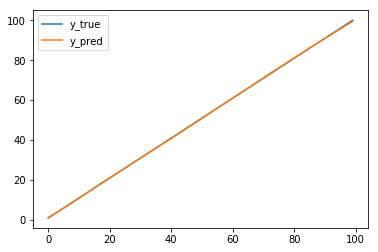

In [88]:
plt.figure()
plt.plot(y.squeeze(), label='y_true')
plt.plot(y_pred.squeeze(), label='y_pred')
plt.legend()
plt.show()

### MLP

In [90]:
# MLP
model = Sequential()
model.add(Dense(50, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X.reshape(-1, 1), y, epochs=1000, batch_size=16, verbose=1)
model.summary()

Epoch 1/1000
100/100 [==============================] - 1s 13ms/step - loss: 3393.0831
Epoch 2/1000
100/100 [==============================] - 0s 0us/step - loss: 3387.1003
Epoch 3/1000
100/100 [==============================] - 0s 0us/step - loss: 3380.9059
Epoch 4/1000
100/100 [==============================] - 0s 156us/step - loss: 3374.9316
Epoch 5/1000
100/100 [==============================] - 0s 156us/step - loss: 3368.6212
Epoch 6/1000
100/100 [==============================] - 0s 156us/step - loss: 3362.2607
Epoch 7/1000
100/100 [==============================] - 0s 156us/step - loss: 3355.8550
Epoch 8/1000
100/100 [==============================] - 0s 156us/step - loss: 3349.0292
Epoch 9/1000
100/100 [==============================] - 0s 156us/step - loss: 3341.8390
Epoch 10/1000
100/100 [==============================] - 0s 156us/step - loss: 3334.0564
Epoch 11/1000
100/100 [==============================] - 0s 156us/step - loss: 3326.0415
Epoch 12/1000
100/100 [============

100/100 [==============================] - 0s 156us/step - loss: 1276.9633
Epoch 94/1000
100/100 [==============================] - 0s 0us/step - loss: 1250.0723
Epoch 95/1000
100/100 [==============================] - 0s 156us/step - loss: 1223.5940
Epoch 96/1000
100/100 [==============================] - 0s 0us/step - loss: 1198.5142
Epoch 97/1000
100/100 [==============================] - 0s 0us/step - loss: 1170.9474
Epoch 98/1000
100/100 [==============================] - 0s 0us/step - loss: 1144.3756
Epoch 99/1000
100/100 [==============================] - 0s 0us/step - loss: 1118.9298
Epoch 100/1000
100/100 [==============================] - 0s 156us/step - loss: 1094.2055
Epoch 101/1000
100/100 [==============================] - 0s 0us/step - loss: 1070.9085
Epoch 102/1000
100/100 [==============================] - 0s 0us/step - loss: 1047.5903
Epoch 103/1000
100/100 [==============================] - 0s 0us/step - loss: 1026.6504
Epoch 104/1000
100/100 [=======================

100/100 [==============================] - 0s 0us/step - loss: 317.4712
Epoch 187/1000
100/100 [==============================] - 0s 0us/step - loss: 316.0598
Epoch 188/1000
100/100 [==============================] - 0s 0us/step - loss: 315.0230
Epoch 189/1000
100/100 [==============================] - 0s 0us/step - loss: 313.7394
Epoch 190/1000
100/100 [==============================] - 0s 0us/step - loss: 312.7301
Epoch 191/1000
100/100 [==============================] - 0s 156us/step - loss: 311.3669
Epoch 192/1000
100/100 [==============================] - 0s 0us/step - loss: 310.3719
Epoch 193/1000
100/100 [==============================] - 0s 156us/step - loss: 309.1217
Epoch 194/1000
100/100 [==============================] - 0s 0us/step - loss: 308.0355
Epoch 195/1000
100/100 [==============================] - 0s 156us/step - loss: 306.8614
Epoch 196/1000
100/100 [==============================] - 0s 156us/step - loss: 305.8030
Epoch 197/1000
100/100 [==========================

100/100 [==============================] - 0s 0us/step - loss: 234.4489
Epoch 280/1000
100/100 [==============================] - 0s 156us/step - loss: 233.5646
Epoch 281/1000
100/100 [==============================] - 0s 156us/step - loss: 232.5896
Epoch 282/1000
100/100 [==============================] - 0s 156us/step - loss: 231.8663
Epoch 283/1000
100/100 [==============================] - 0s 156us/step - loss: 230.9290
Epoch 284/1000
100/100 [==============================] - 0s 0us/step - loss: 230.0422
Epoch 285/1000
100/100 [==============================] - 0s 0us/step - loss: 229.1135
Epoch 286/1000
100/100 [==============================] - 0s 156us/step - loss: 228.1955
Epoch 287/1000
100/100 [==============================] - 0s 156us/step - loss: 227.3644
Epoch 288/1000
100/100 [==============================] - 0s 0us/step - loss: 226.4916
Epoch 289/1000
100/100 [==============================] - 0s 0us/step - loss: 225.6471
Epoch 290/1000
100/100 [======================

100/100 [==============================] - 0s 0us/step - loss: 153.1812
Epoch 373/1000
100/100 [==============================] - 0s 156us/step - loss: 152.3254
Epoch 374/1000
100/100 [==============================] - 0s 0us/step - loss: 151.4288
Epoch 375/1000
100/100 [==============================] - 0s 156us/step - loss: 150.6277
Epoch 376/1000
100/100 [==============================] - 0s 0us/step - loss: 149.7092
Epoch 377/1000
100/100 [==============================] - 0s 156us/step - loss: 148.9609
Epoch 378/1000
100/100 [==============================] - 0s 0us/step - loss: 148.0021
Epoch 379/1000
100/100 [==============================] - 0s 156us/step - loss: 147.1901
Epoch 380/1000
100/100 [==============================] - 0s 0us/step - loss: 146.2838
Epoch 381/1000
100/100 [==============================] - 0s 156us/step - loss: 145.3728
Epoch 382/1000
100/100 [==============================] - 0s 0us/step - loss: 144.4850
Epoch 383/1000
100/100 [========================

100/100 [==============================] - 0s 156us/step - loss: 78.4534
Epoch 466/1000
100/100 [==============================] - 0s 0us/step - loss: 77.7549
Epoch 467/1000
100/100 [==============================] - 0s 156us/step - loss: 77.0270
Epoch 468/1000
100/100 [==============================] - 0s 0us/step - loss: 76.3399
Epoch 469/1000
100/100 [==============================] - 0s 156us/step - loss: 75.6041
Epoch 470/1000
100/100 [==============================] - 0s 156us/step - loss: 74.8436
Epoch 471/1000
100/100 [==============================] - 0s 0us/step - loss: 74.1702
Epoch 472/1000
100/100 [==============================] - 0s 156us/step - loss: 73.4952
Epoch 473/1000
100/100 [==============================] - 0s 0us/step - loss: 72.8274
Epoch 474/1000
100/100 [==============================] - 0s 156us/step - loss: 72.1262
Epoch 475/1000
100/100 [==============================] - 0s 0us/step - loss: 71.4599
Epoch 476/1000
100/100 [==============================] -

100/100 [==============================] - 0s 0us/step - loss: 26.2302
Epoch 560/1000
100/100 [==============================] - 0s 156us/step - loss: 25.8210
Epoch 561/1000
100/100 [==============================] - 0s 0us/step - loss: 25.4517
Epoch 562/1000
100/100 [==============================] - 0s 156us/step - loss: 25.0823
Epoch 563/1000
100/100 [==============================] - 0s 0us/step - loss: 24.6995
Epoch 564/1000
100/100 [==============================] - 0s 0us/step - loss: 24.3671
Epoch 565/1000
100/100 [==============================] - 0s 156us/step - loss: 23.9858
Epoch 566/1000
100/100 [==============================] - 0s 0us/step - loss: 23.6363
Epoch 567/1000
100/100 [==============================] - 0s 156us/step - loss: 23.2784
Epoch 568/1000
100/100 [==============================] - 0s 0us/step - loss: 22.9239
Epoch 569/1000
100/100 [==============================] - 0s 156us/step - loss: 22.5593
Epoch 570/1000
100/100 [==============================] - 0

100/100 [==============================] - 0s 156us/step - loss: 4.5062
Epoch 654/1000
100/100 [==============================] - 0s 0us/step - loss: 4.3920
Epoch 655/1000
100/100 [==============================] - 0s 156us/step - loss: 4.2923
Epoch 656/1000
100/100 [==============================] - 0s 0us/step - loss: 4.1929
Epoch 657/1000
100/100 [==============================] - 0s 0us/step - loss: 4.0982
Epoch 658/1000
100/100 [==============================] - 0s 0us/step - loss: 4.0112
Epoch 659/1000
100/100 [==============================] - 0s 0us/step - loss: 3.9130
Epoch 660/1000
100/100 [==============================] - 0s 156us/step - loss: 3.8233
Epoch 661/1000
100/100 [==============================] - 0s 0us/step - loss: 3.7329
Epoch 662/1000
100/100 [==============================] - 0s 156us/step - loss: 3.6397
Epoch 663/1000
100/100 [==============================] - 0s 0us/step - loss: 3.5558
Epoch 664/1000
100/100 [==============================] - 0s 0us/step - 

100/100 [==============================] - 0s 0us/step - loss: 0.2881
Epoch 749/1000
100/100 [==============================] - 0s 0us/step - loss: 0.2783
Epoch 750/1000
100/100 [==============================] - 0s 156us/step - loss: 0.2683
Epoch 751/1000
100/100 [==============================] - 0s 156us/step - loss: 0.2594
Epoch 752/1000
100/100 [==============================] - 0s 0us/step - loss: 0.2508
Epoch 753/1000
100/100 [==============================] - 0s 156us/step - loss: 0.2421
Epoch 754/1000
100/100 [==============================] - 0s 0us/step - loss: 0.2338
Epoch 755/1000
100/100 [==============================] - 0s 156us/step - loss: 0.2255
Epoch 756/1000
100/100 [==============================] - 0s 0us/step - loss: 0.2176
Epoch 757/1000
100/100 [==============================] - 0s 156us/step - loss: 0.2098
Epoch 758/1000
100/100 [==============================] - 0s 0us/step - loss: 0.2027
Epoch 759/1000
100/100 [==============================] - 0s 156us/ste

100/100 [==============================] - 0s 0us/step - loss: 0.0076
Epoch 844/1000
100/100 [==============================] - 0s 156us/step - loss: 0.0073
Epoch 845/1000
100/100 [==============================] - 0s 0us/step - loss: 0.0071
Epoch 846/1000
100/100 [==============================] - 0s 156us/step - loss: 0.0069
Epoch 847/1000
100/100 [==============================] - 0s 0us/step - loss: 0.0067
Epoch 848/1000
100/100 [==============================] - 0s 0us/step - loss: 0.0065
Epoch 849/1000
100/100 [==============================] - 0s 156us/step - loss: 0.0063
Epoch 850/1000
100/100 [==============================] - 0s 0us/step - loss: 0.0061
Epoch 851/1000
100/100 [==============================] - 0s 157us/step - loss: 0.0059
Epoch 852/1000
100/100 [==============================] - 0s 0us/step - loss: 0.0058
Epoch 853/1000
100/100 [==============================] - 0s 0us/step - loss: 0.0056
Epoch 854/1000
100/100 [==============================] - 0s 156us/step 

100/100 [==============================] - 0s 0us/step - loss: 0.0025
Epoch 939/1000
100/100 [==============================] - 0s 156us/step - loss: 0.0025
Epoch 940/1000
100/100 [==============================] - 0s 0us/step - loss: 0.0025
Epoch 941/1000
100/100 [==============================] - 0s 0us/step - loss: 0.0025
Epoch 942/1000
100/100 [==============================] - 0s 156us/step - loss: 0.0025
Epoch 943/1000
100/100 [==============================] - 0s 0us/step - loss: 0.0025
Epoch 944/1000
100/100 [==============================] - 0s 156us/step - loss: 0.0025
Epoch 945/1000
100/100 [==============================] - 0s 0us/step - loss: 0.0025
Epoch 946/1000
100/100 [==============================] - 0s 156us/step - loss: 0.0025
Epoch 947/1000
100/100 [==============================] - 0s 0us/step - loss: 0.0025
Epoch 948/1000
100/100 [==============================] - 0s 0us/step - loss: 0.0024
Epoch 949/1000
100/100 [==============================] - 0s 156us/step 

In [92]:
y_pred = model.predict(X.reshape(-1, 1))
print('True y:')
print(y[:3])
print()
print('Predicted y:')
print(np.round(y_pred[:3]))  # 四捨五入與真實的y做比較

True y:
[[1]
 [2]
 [3]]

Predicted y:
[[1.]
 [2.]
 [3.]]


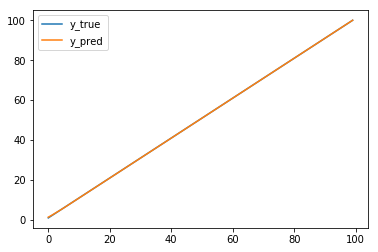

In [93]:
plt.figure()
plt.plot(y.squeeze(), label='y_true')
plt.plot(y_pred.squeeze(), label='y_pred')
plt.legend()
plt.show()

## One to Many

In [111]:
# X shape(sample, features)
# y shape(sample, timesteps, features)
X = np.arange(100).reshape(100, 1) / 100
y = np.array([i+ j for i in range(100) for j in range(1, 4)]).reshape(100, 3)
print('X:')
print(X[:3])
print(f'shape: {X.shape}')
print()
print('y:')
print(y[:3])
print(f'shape: {y.shape}')

X:
[[0.  ]
 [0.01]
 [0.02]]
shape: (100, 1)

y:
[[1 2 3]
 [2 3 4]
 [3 4 5]]
shape: (100, 3)


### LSTM

In [64]:
model = Sequential()
model.add(RepeatVector(3))  # 重複X的值timesteps次，使X的timesteps與y相同
model.add(LSTM(50, input_shape=(3, 1), return_sequences=True))
model.add(TimeDistributed(Dense(10, activation='relu')))  # 因為return回來的是所有的(timesteps個)hidden state所以要用TimeDistributed打包
model.add(Flatten())
model.add(Dense(3))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X, y, epochs=1000, batch_size=16, verbose=1)
model.summary()

Epoch 1/1000
100/100 [==============================] - 1s 12ms/step - loss: 3484.2039
Epoch 2/1000
100/100 [==============================] - 0s 156us/step - loss: 3480.0679
Epoch 3/1000
100/100 [==============================] - 0s 313us/step - loss: 3475.3535
Epoch 4/1000
100/100 [==============================] - 0s 312us/step - loss: 3469.1677
Epoch 5/1000
100/100 [==============================] - 0s 156us/step - loss: 3460.8294
Epoch 6/1000
100/100 [==============================] - 0s 156us/step - loss: 3449.8586
Epoch 7/1000
100/100 [==============================] - 0s 312us/step - loss: 3433.5906
Epoch 8/1000
100/100 [==============================] - 0s 156us/step - loss: 3410.3161
Epoch 9/1000
100/100 [==============================] - 0s 312us/step - loss: 3377.4055
Epoch 10/1000
100/100 [==============================] - 0s 312us/step - loss: 3327.8988
Epoch 11/1000
100/100 [==============================] - 0s 156us/step - loss: 3257.3148
Epoch 12/1000
100/100 [========

100/100 [==============================] - 0s 312us/step - loss: 2.2321
Epoch 95/1000
100/100 [==============================] - 0s 156us/step - loss: 2.2134
Epoch 96/1000
100/100 [==============================] - 0s 156us/step - loss: 2.0920
Epoch 97/1000
100/100 [==============================] - 0s 156us/step - loss: 1.9971
Epoch 98/1000
100/100 [==============================] - 0s 156us/step - loss: 1.9461
Epoch 99/1000
100/100 [==============================] - 0s 156us/step - loss: 1.8783
Epoch 100/1000
100/100 [==============================] - 0s 156us/step - loss: 1.8468
Epoch 101/1000
100/100 [==============================] - 0s 156us/step - loss: 1.7716
Epoch 102/1000
100/100 [==============================] - 0s 156us/step - loss: 1.7011
Epoch 103/1000
100/100 [==============================] - 0s 156us/step - loss: 1.6767
Epoch 104/1000
100/100 [==============================] - 0s 156us/step - loss: 1.6122
Epoch 105/1000
100/100 [==============================] - 0s 15

Epoch 188/1000
100/100 [==============================] - 0s 156us/step - loss: 0.3310
Epoch 189/1000
100/100 [==============================] - 0s 156us/step - loss: 0.3251
Epoch 190/1000
100/100 [==============================] - 0s 156us/step - loss: 0.3247
Epoch 191/1000
100/100 [==============================] - 0s 156us/step - loss: 0.3231
Epoch 192/1000
100/100 [==============================] - 0s 156us/step - loss: 0.3145
Epoch 193/1000
100/100 [==============================] - 0s 156us/step - loss: 0.3158
Epoch 194/1000
100/100 [==============================] - 0s 156us/step - loss: 0.3059
Epoch 195/1000
100/100 [==============================] - 0s 156us/step - loss: 0.2995
Epoch 196/1000
100/100 [==============================] - 0s 156us/step - loss: 0.2986
Epoch 197/1000
100/100 [==============================] - 0s 156us/step - loss: 0.2953
Epoch 198/1000
100/100 [==============================] - 0s 156us/step - loss: 0.2963
Epoch 199/1000
100/100 [===================

100/100 [==============================] - 0s 156us/step - loss: 0.1216
Epoch 283/1000
100/100 [==============================] - 0s 0us/step - loss: 0.1142
Epoch 284/1000
100/100 [==============================] - 0s 156us/step - loss: 0.1119
Epoch 285/1000
100/100 [==============================] - 0s 156us/step - loss: 0.1148
Epoch 286/1000
100/100 [==============================] - 0s 156us/step - loss: 0.1155
Epoch 287/1000
100/100 [==============================] - 0s 156us/step - loss: 0.1093
Epoch 288/1000
100/100 [==============================] - 0s 156us/step - loss: 0.1131
Epoch 289/1000
100/100 [==============================] - 0s 156us/step - loss: 0.1018
Epoch 290/1000
100/100 [==============================] - 0s 156us/step - loss: 0.1019
Epoch 291/1000
100/100 [==============================] - 0s 156us/step - loss: 0.1032
Epoch 292/1000
100/100 [==============================] - 0s 156us/step - loss: 0.1035
Epoch 293/1000
100/100 [==============================] - 0s

100/100 [==============================] - 0s 156us/step - loss: 0.0444
Epoch 377/1000
100/100 [==============================] - 0s 156us/step - loss: 0.0380
Epoch 378/1000
100/100 [==============================] - 0s 156us/step - loss: 0.0371
Epoch 379/1000
100/100 [==============================] - 0s 156us/step - loss: 0.0372
Epoch 380/1000
100/100 [==============================] - 0s 156us/step - loss: 0.0419
Epoch 381/1000
100/100 [==============================] - 0s 156us/step - loss: 0.0525
Epoch 382/1000
100/100 [==============================] - 0s 156us/step - loss: 0.0386
Epoch 383/1000
100/100 [==============================] - 0s 156us/step - loss: 0.0360
Epoch 384/1000
100/100 [==============================] - 0s 156us/step - loss: 0.0364
Epoch 385/1000
100/100 [==============================] - 0s 156us/step - loss: 0.0353
Epoch 386/1000
100/100 [==============================] - 0s 156us/step - loss: 0.0359
Epoch 387/1000
100/100 [==============================] - 

100/100 [==============================] - 0s 156us/step - loss: 0.0182
Epoch 471/1000
100/100 [==============================] - 0s 156us/step - loss: 0.0164
Epoch 472/1000
100/100 [==============================] - 0s 156us/step - loss: 0.0167
Epoch 473/1000
100/100 [==============================] - 0s 156us/step - loss: 0.0176
Epoch 474/1000
100/100 [==============================] - 0s 156us/step - loss: 0.0184
Epoch 475/1000
100/100 [==============================] - 0s 156us/step - loss: 0.0184
Epoch 476/1000
100/100 [==============================] - 0s 156us/step - loss: 0.0176
Epoch 477/1000
100/100 [==============================] - 0s 156us/step - loss: 0.0198
Epoch 478/1000
100/100 [==============================] - 0s 156us/step - loss: 0.0172
Epoch 479/1000
100/100 [==============================] - 0s 156us/step - loss: 0.0156
Epoch 480/1000
100/100 [==============================] - 0s 156us/step - loss: 0.0160
Epoch 481/1000
100/100 [==============================] - 

100/100 [==============================] - 0s 156us/step - loss: 0.0121
Epoch 565/1000
100/100 [==============================] - 0s 156us/step - loss: 0.0113
Epoch 566/1000
100/100 [==============================] - 0s 156us/step - loss: 0.0113
Epoch 567/1000
100/100 [==============================] - 0s 156us/step - loss: 0.0105
Epoch 568/1000
100/100 [==============================] - 0s 156us/step - loss: 0.0107
Epoch 569/1000
100/100 [==============================] - 0s 156us/step - loss: 0.0105
Epoch 570/1000
100/100 [==============================] - 0s 156us/step - loss: 0.0108
Epoch 571/1000
100/100 [==============================] - 0s 156us/step - loss: 0.0108
Epoch 572/1000
100/100 [==============================] - 0s 156us/step - loss: 0.0110
Epoch 573/1000
100/100 [==============================] - 0s 156us/step - loss: 0.0123
Epoch 574/1000
100/100 [==============================] - 0s 156us/step - loss: 0.0330
Epoch 575/1000
100/100 [==============================] - 

100/100 [==============================] - 0s 156us/step - loss: 0.0096
Epoch 659/1000
100/100 [==============================] - 0s 156us/step - loss: 0.0101
Epoch 660/1000
100/100 [==============================] - 0s 156us/step - loss: 0.0101
Epoch 661/1000
100/100 [==============================] - 0s 156us/step - loss: 0.0081
Epoch 662/1000
100/100 [==============================] - 0s 156us/step - loss: 0.0085
Epoch 663/1000
100/100 [==============================] - 0s 156us/step - loss: 0.0080
Epoch 664/1000
100/100 [==============================] - 0s 156us/step - loss: 0.0088
Epoch 665/1000
100/100 [==============================] - 0s 156us/step - loss: 0.0078
Epoch 666/1000
100/100 [==============================] - 0s 156us/step - loss: 0.0079
Epoch 667/1000
100/100 [==============================] - 0s 156us/step - loss: 0.0087
Epoch 668/1000
100/100 [==============================] - 0s 156us/step - loss: 0.0087
Epoch 669/1000
100/100 [==============================] - 

100/100 [==============================] - 0s 156us/step - loss: 0.0060
Epoch 753/1000
100/100 [==============================] - 0s 156us/step - loss: 0.0062
Epoch 754/1000
100/100 [==============================] - 0s 156us/step - loss: 0.0064
Epoch 755/1000
100/100 [==============================] - 0s 156us/step - loss: 0.0062
Epoch 756/1000
100/100 [==============================] - 0s 156us/step - loss: 0.0063
Epoch 757/1000
100/100 [==============================] - 0s 156us/step - loss: 0.0073
Epoch 758/1000
100/100 [==============================] - 0s 156us/step - loss: 0.0059
Epoch 759/1000
100/100 [==============================] - 0s 156us/step - loss: 0.0061
Epoch 760/1000
100/100 [==============================] - 0s 156us/step - loss: 0.0065
Epoch 761/1000
100/100 [==============================] - 0s 156us/step - loss: 0.0068
Epoch 762/1000
100/100 [==============================] - 0s 156us/step - loss: 0.0065
Epoch 763/1000
100/100 [==============================] - 

100/100 [==============================] - 0s 156us/step - loss: 0.0046
Epoch 847/1000
100/100 [==============================] - 0s 156us/step - loss: 0.0049
Epoch 848/1000
100/100 [==============================] - 0s 156us/step - loss: 0.0101
Epoch 849/1000
100/100 [==============================] - 0s 156us/step - loss: 0.0070
Epoch 850/1000
100/100 [==============================] - 0s 156us/step - loss: 0.0064
Epoch 851/1000
100/100 [==============================] - 0s 156us/step - loss: 0.0052
Epoch 852/1000
100/100 [==============================] - 0s 156us/step - loss: 0.0051
Epoch 853/1000
100/100 [==============================] - 0s 0us/step - loss: 0.0049
Epoch 854/1000
100/100 [==============================] - 0s 156us/step - loss: 0.0067
Epoch 855/1000
100/100 [==============================] - 0s 0us/step - loss: 0.0067
Epoch 856/1000
100/100 [==============================] - 0s 156us/step - loss: 0.0061
Epoch 857/1000
100/100 [==============================] - 0s 1

100/100 [==============================] - 0s 156us/step - loss: 0.0042
Epoch 941/1000
100/100 [==============================] - 0s 156us/step - loss: 0.0039
Epoch 942/1000
100/100 [==============================] - 0s 156us/step - loss: 0.0040
Epoch 943/1000
100/100 [==============================] - 0s 156us/step - loss: 0.0040
Epoch 944/1000
100/100 [==============================] - 0s 156us/step - loss: 0.0042
Epoch 945/1000
100/100 [==============================] - 0s 156us/step - loss: 0.0045
Epoch 946/1000
100/100 [==============================] - 0s 156us/step - loss: 0.0065
Epoch 947/1000
100/100 [==============================] - 0s 156us/step - loss: 0.0050
Epoch 948/1000
100/100 [==============================] - 0s 156us/step - loss: 0.0038
Epoch 949/1000
100/100 [==============================] - 0s 156us/step - loss: 0.0061
Epoch 950/1000
100/100 [==============================] - 0s 156us/step - loss: 0.0061
Epoch 951/1000
100/100 [==============================] - 

In [65]:
y_pred = model.predict(X)
print('True y:')
print(y[:3])
print()
print('Predicted y:')
print(np.round(y_pred[:3]))  # 四捨五入與真實的y做比較

True y:
[[1 2 3]
 [2 3 4]
 [3 4 5]]

Predicted y:
[[1. 2. 3.]
 [2. 3. 4.]
 [3. 4. 5.]]


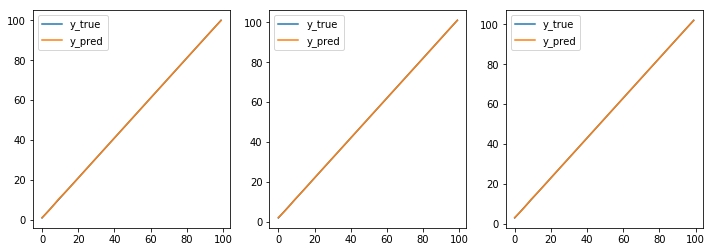

In [66]:
fig, ax = plt.subplots(1, 3, figsize=(12, 4))
for i in range(3):
    ax[i].plot(y[:, i].squeeze(), label='y_true')
    ax[i].plot(y_pred[:, i].squeeze(), label='y_pred')
    ax[i].legend()
plt.show()

### MLP

In [112]:
model = Sequential()
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(3))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X, y, epochs=1000, batch_size=16, verbose=1)
model.summary()

Epoch 1/1000
100/100 [==============================] - 2s 16ms/step - loss: 3485.1952
Epoch 2/1000
100/100 [==============================] - 0s 156us/step - loss: 3483.6898
Epoch 3/1000
100/100 [==============================] - 0s 157us/step - loss: 3482.2551
Epoch 4/1000
100/100 [==============================] - 0s 156us/step - loss: 3480.9341
Epoch 5/1000
100/100 [==============================] - 0s 156us/step - loss: 3479.7130
Epoch 6/1000
100/100 [==============================] - 0s 156us/step - loss: 3478.3368
Epoch 7/1000
100/100 [==============================] - 0s 156us/step - loss: 3476.8627
Epoch 8/1000
100/100 [==============================] - 0s 156us/step - loss: 3475.3207
Epoch 9/1000
100/100 [==============================] - 0s 156us/step - loss: 3473.5878
Epoch 10/1000
100/100 [==============================] - 0s 156us/step - loss: 3471.8397
Epoch 11/1000
100/100 [==============================] - 0s 313us/step - loss: 3469.8045
Epoch 12/1000
100/100 [========

100/100 [==============================] - 0s 200us/step - loss: 2153.7799
Epoch 94/1000
100/100 [==============================] - 0s 100us/step - loss: 2121.0873
Epoch 95/1000
100/100 [==============================] - 0s 116us/step - loss: 2088.6637
Epoch 96/1000
100/100 [==============================] - ETA: 0s - loss: 2482.23 - 0s 130us/step - loss: 2057.1361
Epoch 97/1000
100/100 [==============================] - 0s 102us/step - loss: 2026.6676
Epoch 98/1000
100/100 [==============================] - 0s 99us/step - loss: 1995.1480
Epoch 99/1000
100/100 [==============================] - 0s 100us/step - loss: 1965.2424
Epoch 100/1000
100/100 [==============================] - 0s 101us/step - loss: 1934.2538
Epoch 101/1000
100/100 [==============================] - 0s 201us/step - loss: 1904.1828
Epoch 102/1000
100/100 [==============================] - 0s 100us/step - loss: 1872.9474
Epoch 103/1000
100/100 [==============================] - 0s 117us/step - loss: 1842.0402
Epoch 

100/100 [==============================] - 0s 0us/step - loss: 353.8323
Epoch 186/1000
100/100 [==============================] - 0s 0us/step - loss: 351.2340
Epoch 187/1000
100/100 [==============================] - 0s 156us/step - loss: 348.6108
Epoch 188/1000
100/100 [==============================] - 0s 156us/step - loss: 345.7588
Epoch 189/1000
100/100 [==============================] - 0s 156us/step - loss: 343.2365
Epoch 190/1000
100/100 [==============================] - 0s 65us/step - loss: 340.7827
Epoch 191/1000
100/100 [==============================] - 0s 156us/step - loss: 337.8937
Epoch 192/1000
100/100 [==============================] - 0s 0us/step - loss: 335.2408
Epoch 193/1000
100/100 [==============================] - 0s 0us/step - loss: 333.1677
Epoch 194/1000
100/100 [==============================] - 0s 156us/step - loss: 331.1284
Epoch 195/1000
100/100 [==============================] - 0s 156us/step - loss: 329.4577
Epoch 196/1000
100/100 [=====================

Epoch 278/1000
100/100 [==============================] - 0s 156us/step - loss: 258.8960
Epoch 279/1000
100/100 [==============================] - 0s 156us/step - loss: 258.1593
Epoch 280/1000
100/100 [==============================] - 0s 156us/step - loss: 257.4362
Epoch 281/1000
100/100 [==============================] - 0s 0us/step - loss: 256.6295
Epoch 282/1000
100/100 [==============================] - 0s 156us/step - loss: 255.9246
Epoch 283/1000
100/100 [==============================] - 0s 156us/step - loss: 255.1855
Epoch 284/1000
100/100 [==============================] - 0s 0us/step - loss: 254.4689
Epoch 285/1000
100/100 [==============================] - 0s 221us/step - loss: 253.6254
Epoch 286/1000
100/100 [==============================] - 0s 0us/step - loss: 252.8921
Epoch 287/1000
100/100 [==============================] - 0s 156us/step - loss: 252.1692
Epoch 288/1000
100/100 [==============================] - 0s 156us/step - loss: 251.5292
Epoch 289/1000
100/100 [===

100/100 [==============================] - 0s 51us/step - loss: 188.7051
Epoch 371/1000
100/100 [==============================] - 0s 102us/step - loss: 187.8473
Epoch 372/1000
100/100 [==============================] - 0s 95us/step - loss: 186.9998
Epoch 373/1000
100/100 [==============================] - 0s 101us/step - loss: 186.2564
Epoch 374/1000
100/100 [==============================] - 0s 100us/step - loss: 185.4512
Epoch 375/1000
100/100 [==============================] - 0s 100us/step - loss: 184.6681
Epoch 376/1000
100/100 [==============================] - 0s 96us/step - loss: 183.8959
Epoch 377/1000
100/100 [==============================] - 0s 100us/step - loss: 183.1287
Epoch 378/1000
100/100 [==============================] - 0s 100us/step - loss: 182.3834
Epoch 379/1000
100/100 [==============================] - 0s 112us/step - loss: 181.5252
Epoch 380/1000
100/100 [==============================] - 0s 85us/step - loss: 180.7671
Epoch 381/1000
100/100 [================

100/100 [==============================] - 0s 0us/step - loss: 116.9867
Epoch 463/1000
100/100 [==============================] - 0s 141us/step - loss: 116.1551
Epoch 464/1000
100/100 [==============================] - 0s 55us/step - loss: 115.4087
Epoch 465/1000
100/100 [==============================] - 0s 102us/step - loss: 114.7249
Epoch 466/1000
100/100 [==============================] - 0s 98us/step - loss: 113.9780
Epoch 467/1000
100/100 [==============================] - 0s 0us/step - loss: 113.3355
Epoch 468/1000
100/100 [==============================] - 0s 0us/step - loss: 112.4688
Epoch 469/1000
100/100 [==============================] - 0s 103us/step - loss: 111.7411
Epoch 470/1000
100/100 [==============================] - 0s 101us/step - loss: 110.9508
Epoch 471/1000
100/100 [==============================] - 0s 75us/step - loss: 110.2218
Epoch 472/1000
100/100 [==============================] - 0s 0us/step - loss: 109.4565
Epoch 473/1000
100/100 [=======================

100/100 [==============================] - 0s 156us/step - loss: 54.3568
Epoch 556/1000
100/100 [==============================] - 0s 0us/step - loss: 53.7894
Epoch 557/1000
100/100 [==============================] - 0s 0us/step - loss: 53.2315
Epoch 558/1000
100/100 [==============================] - 0s 156us/step - loss: 52.6749
Epoch 559/1000
100/100 [==============================] - 0s 0us/step - loss: 52.1372
Epoch 560/1000
100/100 [==============================] - 0s 156us/step - loss: 51.5462
Epoch 561/1000
100/100 [==============================] - 0s 0us/step - loss: 51.0326
Epoch 562/1000
100/100 [==============================] - 0s 156us/step - loss: 50.4526
Epoch 563/1000
100/100 [==============================] - 0s 0us/step - loss: 49.9161
Epoch 564/1000
100/100 [==============================] - 0s 156us/step - loss: 49.3506
Epoch 565/1000
100/100 [==============================] - 0s 0us/step - loss: 48.8283
Epoch 566/1000
100/100 [==============================] - 0

100/100 [==============================] - 0s 0us/step - loss: 14.7183
Epoch 650/1000
100/100 [==============================] - 0s 156us/step - loss: 14.4780
Epoch 651/1000
100/100 [==============================] - 0s 0us/step - loss: 14.2090
Epoch 652/1000
100/100 [==============================] - 0s 156us/step - loss: 13.9553
Epoch 653/1000
100/100 [==============================] - 0s 0us/step - loss: 13.6872
Epoch 654/1000
100/100 [==============================] - 0s 156us/step - loss: 13.4549
Epoch 655/1000
100/100 [==============================] - 0s 0us/step - loss: 13.2005
Epoch 656/1000
100/100 [==============================] - 0s 156us/step - loss: 12.9541
Epoch 657/1000
100/100 [==============================] - 0s 0us/step - loss: 12.7077
Epoch 658/1000
100/100 [==============================] - 0s 156us/step - loss: 12.4651
Epoch 659/1000
100/100 [==============================] - 0s 0us/step - loss: 12.2147
Epoch 660/1000
100/100 [==============================] - 0

Epoch 744/1000
100/100 [==============================] - 0s 0us/step - loss: 1.1991
Epoch 745/1000
100/100 [==============================] - 0s 156us/step - loss: 1.1401
Epoch 746/1000
100/100 [==============================] - 0s 0us/step - loss: 1.0892
Epoch 747/1000
100/100 [==============================] - 0s 156us/step - loss: 1.0345
Epoch 748/1000
100/100 [==============================] - 0s 0us/step - loss: 0.9843
Epoch 749/1000
100/100 [==============================] - 0s 156us/step - loss: 0.9343
Epoch 750/1000
100/100 [==============================] - 0s 0us/step - loss: 0.8884
Epoch 751/1000
100/100 [==============================] - 0s 156us/step - loss: 0.8444
Epoch 752/1000
100/100 [==============================] - 0s 0us/step - loss: 0.8023
Epoch 753/1000
100/100 [==============================] - 0s 156us/step - loss: 0.7633
Epoch 754/1000
100/100 [==============================] - 0s 0us/step - loss: 0.7309
Epoch 755/1000
100/100 [==============================]

100/100 [==============================] - 0s 156us/step - loss: 0.0117
Epoch 840/1000
100/100 [==============================] - 0s 0us/step - loss: 0.0111
Epoch 841/1000
100/100 [==============================] - 0s 156us/step - loss: 0.0106
Epoch 842/1000
100/100 [==============================] - 0s 0us/step - loss: 0.0102
Epoch 843/1000
100/100 [==============================] - 0s 156us/step - loss: 0.0097
Epoch 844/1000
100/100 [==============================] - 0s 156us/step - loss: 0.0093
Epoch 845/1000
100/100 [==============================] - 0s 0us/step - loss: 0.0088
Epoch 846/1000
100/100 [==============================] - 0s 156us/step - loss: 0.0084
Epoch 847/1000
100/100 [==============================] - 0s 0us/step - loss: 0.0080
Epoch 848/1000
100/100 [==============================] - 0s 156us/step - loss: 0.0076
Epoch 849/1000
100/100 [==============================] - 0s 0us/step - loss: 0.0073
Epoch 850/1000
100/100 [==============================] - 0s 156us/s

100/100 [==============================] - 0s 0us/step - loss: 1.9077e-04
Epoch 933/1000
100/100 [==============================] - 0s 156us/step - loss: 1.8310e-04
Epoch 934/1000
100/100 [==============================] - 0s 0us/step - loss: 1.7538e-04
Epoch 935/1000
100/100 [==============================] - 0s 156us/step - loss: 1.6783e-04
Epoch 936/1000
100/100 [==============================] - 0s 0us/step - loss: 1.6099e-04
Epoch 937/1000
100/100 [==============================] - 0s 156us/step - loss: 1.5417e-04
Epoch 938/1000
100/100 [==============================] - 0s 0us/step - loss: 1.4789e-04
Epoch 939/1000
100/100 [==============================] - 0s 156us/step - loss: 1.4196e-04
Epoch 940/1000
100/100 [==============================] - 0s 0us/step - loss: 1.3566e-04
Epoch 941/1000
100/100 [==============================] - 0s 0us/step - loss: 1.3016e-04
Epoch 942/1000
100/100 [==============================] - 0s 0us/step - loss: 1.2439e-04
Epoch 943/1000
100/100 [====

In [101]:
y_pred = model.predict(X)
print('True y:')
print(y[:3])
print()
print('Predicted y:')
print(np.round(y_pred[:3]))  # 四捨五入與真實的y做比較

True y:
[[1 2 3]
 [2 3 4]
 [3 4 5]]

Predicted y:
[[1. 2. 3.]
 [2. 3. 4.]
 [3. 4. 5.]]


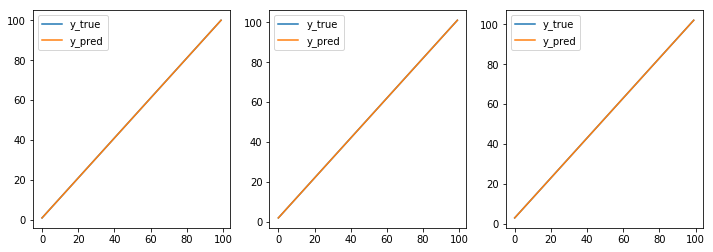

In [102]:
fig, ax = plt.subplots(1, 3, figsize=(12, 4))
for i in range(3):
    ax[i].plot(y[:, i].squeeze(), label='y_true')
    ax[i].plot(y_pred[:, i].squeeze(), label='y_pred')
    ax[i].legend()
plt.show()

## Many to Many

In [103]:
# X shape(sample, timesteps, features)
# y shape(sample, timesteps, features)
X = np.array([i+ j for i in range(100) for j in range(3)]).reshape(100, 3, 1) / 100
y = np.array([i+ j for i in range(100) for j in range(3, 6)]).reshape(100, 3)
print('X:')
print(X[:3])
print(f'shape: {X.shape}')
print()
print('y:')
print(y[:3])
print(f'shape: {y.shape}')

X:
[[[0.  ]
  [0.01]
  [0.02]]

 [[0.01]
  [0.02]
  [0.03]]

 [[0.02]
  [0.03]
  [0.04]]]
shape: (100, 3, 1)

y:
[[3 4 5]
 [4 5 6]
 [5 6 7]]
shape: (100, 3)


### LSTM

In [109]:
model = Sequential()
model.add(LSTM(10, input_shape=(3, 1), return_sequences=True))
model.add(TimeDistributed(Dense(10, activation='relu')))# 因為return回來的是所有的(timesteps個)hidden state所以要用TimeDistributed打包
model.add(Flatten())
model.add(Dense(3))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X, y, epochs=1000, batch_size=16, verbose=2)
model.summary()

Epoch 1/1000
 - 2s - loss: 3693.3842
Epoch 2/1000
 - 0s - loss: 3690.7273
Epoch 3/1000
 - 0s - loss: 3687.4824
Epoch 4/1000
 - 0s - loss: 3683.7686
Epoch 5/1000
 - 0s - loss: 3679.1957
Epoch 6/1000
 - 0s - loss: 3673.4757
Epoch 7/1000
 - 0s - loss: 3666.7210
Epoch 8/1000
 - 0s - loss: 3658.4297
Epoch 9/1000
 - 0s - loss: 3648.3472
Epoch 10/1000
 - 0s - loss: 3636.0391
Epoch 11/1000
 - 0s - loss: 3621.0191
Epoch 12/1000
 - 0s - loss: 3603.1340
Epoch 13/1000
 - 0s - loss: 3581.1571
Epoch 14/1000
 - 0s - loss: 3556.3118
Epoch 15/1000
 - 0s - loss: 3526.7023
Epoch 16/1000
 - 0s - loss: 3492.0321
Epoch 17/1000
 - 0s - loss: 3449.5332
Epoch 18/1000
 - 0s - loss: 3401.5497
Epoch 19/1000
 - 0s - loss: 3346.5682
Epoch 20/1000
 - 0s - loss: 3284.5426
Epoch 21/1000
 - 0s - loss: 3212.1564
Epoch 22/1000
 - 0s - loss: 3135.0820
Epoch 23/1000
 - 0s - loss: 3050.9705
Epoch 24/1000
 - 0s - loss: 2961.4477
Epoch 25/1000
 - 0s - loss: 2861.4683
Epoch 26/1000
 - 0s - loss: 2751.2307
Epoch 27/1000
 - 0s -

Epoch 223/1000
 - 0s - loss: 2.1506
Epoch 224/1000
 - 0s - loss: 2.1509
Epoch 225/1000
 - 0s - loss: 2.0799
Epoch 226/1000
 - 0s - loss: 2.0514
Epoch 227/1000
 - 0s - loss: 1.9419
Epoch 228/1000
 - 0s - loss: 1.9599
Epoch 229/1000
 - 0s - loss: 1.9077
Epoch 230/1000
 - 0s - loss: 1.8297
Epoch 231/1000
 - 0s - loss: 1.7966
Epoch 232/1000
 - 0s - loss: 1.7443
Epoch 233/1000
 - 0s - loss: 1.7030
Epoch 234/1000
 - 0s - loss: 1.6911
Epoch 235/1000
 - 0s - loss: 1.6046
Epoch 236/1000
 - 0s - loss: 1.6207
Epoch 237/1000
 - 0s - loss: 1.5685
Epoch 238/1000
 - 0s - loss: 1.5426
Epoch 239/1000
 - 0s - loss: 1.4743
Epoch 240/1000
 - 0s - loss: 1.4616
Epoch 241/1000
 - 0s - loss: 1.3950
Epoch 242/1000
 - 0s - loss: 1.4137
Epoch 243/1000
 - 0s - loss: 1.3664
Epoch 244/1000
 - 0s - loss: 1.3972
Epoch 245/1000
 - 0s - loss: 1.2867
Epoch 246/1000
 - 0s - loss: 1.2849
Epoch 247/1000
 - 0s - loss: 1.2052
Epoch 248/1000
 - 0s - loss: 1.2173
Epoch 249/1000
 - 0s - loss: 1.1635
Epoch 250/1000
 - 0s - loss:

Epoch 451/1000
 - 0s - loss: 0.1147
Epoch 452/1000
 - 0s - loss: 0.1136
Epoch 453/1000
 - 0s - loss: 0.1083
Epoch 454/1000
 - 0s - loss: 0.1032
Epoch 455/1000
 - 0s - loss: 0.1051
Epoch 456/1000
 - 0s - loss: 0.1051
Epoch 457/1000
 - 0s - loss: 0.1052
Epoch 458/1000
 - 0s - loss: 0.1024
Epoch 459/1000
 - 0s - loss: 0.1072
Epoch 460/1000
 - 0s - loss: 0.1131
Epoch 461/1000
 - 0s - loss: 0.1114
Epoch 462/1000
 - 0s - loss: 0.1001
Epoch 463/1000
 - 0s - loss: 0.0994
Epoch 464/1000
 - 0s - loss: 0.1129
Epoch 465/1000
 - 0s - loss: 0.1000
Epoch 466/1000
 - 0s - loss: 0.0965
Epoch 467/1000
 - 0s - loss: 0.0967
Epoch 468/1000
 - 0s - loss: 0.0933
Epoch 469/1000
 - 0s - loss: 0.0925
Epoch 470/1000
 - 0s - loss: 0.0938
Epoch 471/1000
 - 0s - loss: 0.0926
Epoch 472/1000
 - 0s - loss: 0.0928
Epoch 473/1000
 - 0s - loss: 0.0903
Epoch 474/1000
 - 0s - loss: 0.0938
Epoch 475/1000
 - 0s - loss: 0.0894
Epoch 476/1000
 - 0s - loss: 0.0892
Epoch 477/1000
 - 0s - loss: 0.0921
Epoch 478/1000
 - 0s - loss:

Epoch 679/1000
 - 0s - loss: 0.0260
Epoch 680/1000
 - 0s - loss: 0.0309
Epoch 681/1000
 - 0s - loss: 0.0294
Epoch 682/1000
 - 0s - loss: 0.0263
Epoch 683/1000
 - 0s - loss: 0.0271
Epoch 684/1000
 - 0s - loss: 0.0283
Epoch 685/1000
 - 0s - loss: 0.0262
Epoch 686/1000
 - 0s - loss: 0.0305
Epoch 687/1000
 - 0s - loss: 0.0267
Epoch 688/1000
 - 0s - loss: 0.0255
Epoch 689/1000
 - 0s - loss: 0.0255
Epoch 690/1000
 - 0s - loss: 0.0281
Epoch 691/1000
 - 0s - loss: 0.0310
Epoch 692/1000
 - 0s - loss: 0.0244
Epoch 693/1000
 - 0s - loss: 0.0239
Epoch 694/1000
 - 0s - loss: 0.0249
Epoch 695/1000
 - 0s - loss: 0.0235
Epoch 696/1000
 - 0s - loss: 0.0236
Epoch 697/1000
 - 0s - loss: 0.0235
Epoch 698/1000
 - 0s - loss: 0.0234
Epoch 699/1000
 - 0s - loss: 0.0232
Epoch 700/1000
 - 0s - loss: 0.0236
Epoch 701/1000
 - 0s - loss: 0.0258
Epoch 702/1000
 - 0s - loss: 0.0255
Epoch 703/1000
 - 0s - loss: 0.0243
Epoch 704/1000
 - 0s - loss: 0.0242
Epoch 705/1000
 - 0s - loss: 0.0267
Epoch 706/1000
 - 0s - loss:

Epoch 907/1000
 - 0s - loss: 0.0093
Epoch 908/1000
 - 0s - loss: 0.0102
Epoch 909/1000
 - 0s - loss: 0.0095
Epoch 910/1000
 - 0s - loss: 0.0103
Epoch 911/1000
 - 0s - loss: 0.0117
Epoch 912/1000
 - 0s - loss: 0.0153
Epoch 913/1000
 - 0s - loss: 0.0147
Epoch 914/1000
 - 0s - loss: 0.0139
Epoch 915/1000
 - 0s - loss: 0.0092
Epoch 916/1000
 - 0s - loss: 0.0085
Epoch 917/1000
 - 0s - loss: 0.0085
Epoch 918/1000
 - 0s - loss: 0.0087
Epoch 919/1000
 - 0s - loss: 0.0091
Epoch 920/1000
 - 0s - loss: 0.0082
Epoch 921/1000
 - 0s - loss: 0.0093
Epoch 922/1000
 - 0s - loss: 0.0089
Epoch 923/1000
 - 0s - loss: 0.0079
Epoch 924/1000
 - 0s - loss: 0.0085
Epoch 925/1000
 - 0s - loss: 0.0090
Epoch 926/1000
 - 0s - loss: 0.0116
Epoch 927/1000
 - 0s - loss: 0.0131
Epoch 928/1000
 - 0s - loss: 0.0238
Epoch 929/1000
 - 0s - loss: 0.0170
Epoch 930/1000
 - 0s - loss: 0.0220
Epoch 931/1000
 - 0s - loss: 0.0109
Epoch 932/1000
 - 0s - loss: 0.0118
Epoch 933/1000
 - 0s - loss: 0.0080
Epoch 934/1000
 - 0s - loss:

In [58]:
y_pred = model.predict(X)
print('True y:')
print(y[:3])
print()
print('Predicted y:')
print(np.round(y_pred[:3]))  # 四捨五入與真實的y做比較

True y:
[[3 4 5]
 [4 5 6]
 [5 6 7]]

Predicted y:
[[3. 4. 5.]
 [4. 5. 6.]
 [5. 6. 7.]]


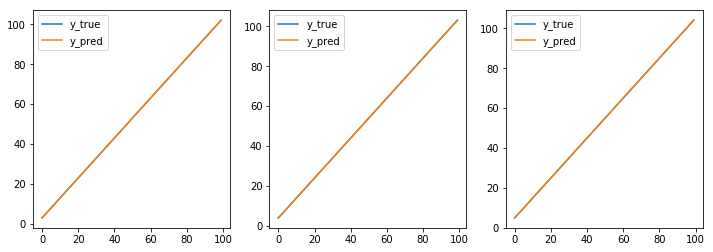

In [61]:
fig, ax = plt.subplots(1, 3, figsize=(12, 4))
for i in range(3):
    ax[i].plot(y[:, i].squeeze(), label='y_true')
    ax[i].plot(y_pred[:, i].squeeze(), label='y_pred')
    ax[i].legend()
plt.show()

### MLP

In [106]:
model = Sequential()
model.add(Dense(10))
model.add(Dense(10))
model.add(Dense(3))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X.reshape(-1, 3), y, epochs=1000, batch_size=16, verbose=2)
model.summary()

Epoch 1/1000
 - 1s - loss: 3694.4213
Epoch 2/1000
 - 0s - loss: 3679.2754
Epoch 3/1000
 - 0s - loss: 3663.1083
Epoch 4/1000
 - 0s - loss: 3646.1568
Epoch 5/1000
 - 0s - loss: 3630.0975
Epoch 6/1000
 - 0s - loss: 3612.4992
Epoch 7/1000
 - 0s - loss: 3594.8587
Epoch 8/1000
 - 0s - loss: 3574.9079
Epoch 9/1000
 - 0s - loss: 3553.8382
Epoch 10/1000
 - 0s - loss: 3532.1492
Epoch 11/1000
 - 0s - loss: 3508.0229
Epoch 12/1000
 - 0s - loss: 3480.8674
Epoch 13/1000
 - 0s - loss: 3450.9659
Epoch 14/1000
 - 0s - loss: 3419.7497
Epoch 15/1000
 - 0s - loss: 3383.9249
Epoch 16/1000
 - 0s - loss: 3346.3788
Epoch 17/1000
 - 0s - loss: 3304.1268
Epoch 18/1000
 - 0s - loss: 3259.5108
Epoch 19/1000
 - 0s - loss: 3210.8916
Epoch 20/1000
 - 0s - loss: 3157.8097
Epoch 21/1000
 - 0s - loss: 3098.6203
Epoch 22/1000
 - 0s - loss: 3035.9180
Epoch 23/1000
 - 0s - loss: 2965.6144
Epoch 24/1000
 - 0s - loss: 2891.9670
Epoch 25/1000
 - 0s - loss: 2812.2362
Epoch 26/1000
 - 0s - loss: 2731.3085
Epoch 27/1000
 - 0s -

Epoch 224/1000
 - 0s - loss: 2.5611
Epoch 225/1000
 - 0s - loss: 2.4448
Epoch 226/1000
 - 0s - loss: 2.3353
Epoch 227/1000
 - 0s - loss: 2.2305
Epoch 228/1000
 - 0s - loss: 2.1252
Epoch 229/1000
 - 0s - loss: 2.0228
Epoch 230/1000
 - 0s - loss: 1.9276
Epoch 231/1000
 - 0s - loss: 1.8341
Epoch 232/1000
 - 0s - loss: 1.7483
Epoch 233/1000
 - 0s - loss: 1.6541
Epoch 234/1000
 - 0s - loss: 1.5755
Epoch 235/1000
 - 0s - loss: 1.4923
Epoch 236/1000
 - 0s - loss: 1.4168
Epoch 237/1000
 - 0s - loss: 1.3408
Epoch 238/1000
 - 0s - loss: 1.2625
Epoch 239/1000
 - 0s - loss: 1.1972
Epoch 240/1000
 - 0s - loss: 1.1365
Epoch 241/1000
 - 0s - loss: 1.0783
Epoch 242/1000
 - 0s - loss: 1.0192
Epoch 243/1000
 - 0s - loss: 0.9650
Epoch 244/1000
 - 0s - loss: 0.9141
Epoch 245/1000
 - 0s - loss: 0.8626
Epoch 246/1000
 - 0s - loss: 0.8147
Epoch 247/1000
 - 0s - loss: 0.7727
Epoch 248/1000
 - 0s - loss: 0.7276
Epoch 249/1000
 - 0s - loss: 0.6882
Epoch 250/1000
 - 0s - loss: 0.6502
Epoch 251/1000
 - 0s - loss:

Epoch 452/1000
 - 0s - loss: 0.0038
Epoch 453/1000
 - 0s - loss: 0.0038
Epoch 454/1000
 - 0s - loss: 0.0038
Epoch 455/1000
 - 0s - loss: 0.0038
Epoch 456/1000
 - 0s - loss: 0.0038
Epoch 457/1000
 - 0s - loss: 0.0037
Epoch 458/1000
 - 0s - loss: 0.0037
Epoch 459/1000
 - 0s - loss: 0.0037
Epoch 460/1000
 - 0s - loss: 0.0037
Epoch 461/1000
 - 0s - loss: 0.0037
Epoch 462/1000
 - 0s - loss: 0.0037
Epoch 463/1000
 - 0s - loss: 0.0036
Epoch 464/1000
 - 0s - loss: 0.0036
Epoch 465/1000
 - 0s - loss: 0.0036
Epoch 466/1000
 - 0s - loss: 0.0036
Epoch 467/1000
 - 0s - loss: 0.0036
Epoch 468/1000
 - 0s - loss: 0.0035
Epoch 469/1000
 - 0s - loss: 0.0035
Epoch 470/1000
 - 0s - loss: 0.0035
Epoch 471/1000
 - 0s - loss: 0.0035
Epoch 472/1000
 - 0s - loss: 0.0035
Epoch 473/1000
 - 0s - loss: 0.0035
Epoch 474/1000
 - 0s - loss: 0.0034
Epoch 475/1000
 - 0s - loss: 0.0034
Epoch 476/1000
 - 0s - loss: 0.0034
Epoch 477/1000
 - 0s - loss: 0.0034
Epoch 478/1000
 - 0s - loss: 0.0034
Epoch 479/1000
 - 0s - loss:

Epoch 677/1000
 - 0s - loss: 7.7605e-04
Epoch 678/1000
 - 0s - loss: 7.6970e-04
Epoch 679/1000
 - 0s - loss: 7.6545e-04
Epoch 680/1000
 - 0s - loss: 7.5805e-04
Epoch 681/1000
 - 0s - loss: 7.4893e-04
Epoch 682/1000
 - 0s - loss: 7.4071e-04
Epoch 683/1000
 - 0s - loss: 7.3575e-04
Epoch 684/1000
 - 0s - loss: 7.2790e-04
Epoch 685/1000
 - 0s - loss: 7.2080e-04
Epoch 686/1000
 - 0s - loss: 7.1314e-04
Epoch 687/1000
 - 0s - loss: 7.0585e-04
Epoch 688/1000
 - 0s - loss: 6.9923e-04
Epoch 689/1000
 - 0s - loss: 6.9164e-04
Epoch 690/1000
 - 0s - loss: 6.8580e-04
Epoch 691/1000
 - 0s - loss: 6.7880e-04
Epoch 692/1000
 - 0s - loss: 6.7090e-04
Epoch 693/1000
 - 0s - loss: 6.6412e-04
Epoch 694/1000
 - 0s - loss: 6.5829e-04
Epoch 695/1000
 - 0s - loss: 6.5148e-04
Epoch 696/1000
 - 0s - loss: 6.4380e-04
Epoch 697/1000
 - 0s - loss: 6.3726e-04
Epoch 698/1000
 - 0s - loss: 6.3125e-04
Epoch 699/1000
 - 0s - loss: 6.2431e-04
Epoch 700/1000
 - 0s - loss: 6.1832e-04
Epoch 701/1000
 - 0s - loss: 6.1161e-04


Epoch 882/1000
 - 0s - loss: 4.8594e-05
Epoch 883/1000
 - 0s - loss: 4.7406e-05
Epoch 884/1000
 - 0s - loss: 4.6525e-05
Epoch 885/1000
 - 0s - loss: 4.5673e-05
Epoch 886/1000
 - 0s - loss: 4.4820e-05
Epoch 887/1000
 - 0s - loss: 4.3815e-05
Epoch 888/1000
 - 0s - loss: 4.3084e-05
Epoch 889/1000
 - 0s - loss: 4.2461e-05
Epoch 890/1000
 - 0s - loss: 4.1802e-05
Epoch 891/1000
 - 0s - loss: 4.0698e-05
Epoch 892/1000
 - 0s - loss: 4.0016e-05
Epoch 893/1000
 - 0s - loss: 3.9179e-05
Epoch 894/1000
 - 0s - loss: 3.8699e-05
Epoch 895/1000
 - 0s - loss: 3.8215e-05
Epoch 896/1000
 - 0s - loss: 3.7387e-05
Epoch 897/1000
 - 0s - loss: 3.6360e-05
Epoch 898/1000
 - 0s - loss: 3.5370e-05
Epoch 899/1000
 - 0s - loss: 3.4825e-05
Epoch 900/1000
 - 0s - loss: 3.4213e-05
Epoch 901/1000
 - 0s - loss: 3.3423e-05
Epoch 902/1000
 - 0s - loss: 3.2609e-05
Epoch 903/1000
 - 0s - loss: 3.2170e-05
Epoch 904/1000
 - 0s - loss: 3.1362e-05
Epoch 905/1000
 - 0s - loss: 3.0679e-05
Epoch 906/1000
 - 0s - loss: 3.0168e-05


In [107]:
y_pred = model.predict(X.reshape(-1, 3))
print('True y:')
print(y[:3])
print()
print('Predicted y:')
print(np.round(y_pred[:3]))  # 四捨五入與真實的y做比較

True y:
[[3 4 5]
 [4 5 6]
 [5 6 7]]

Predicted y:
[[3. 4. 5.]
 [4. 5. 6.]
 [5. 6. 7.]]


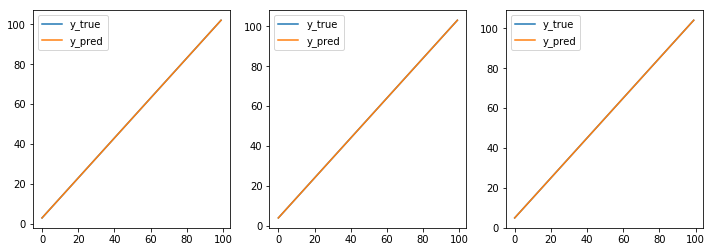

In [108]:
fig, ax = plt.subplots(1, 3, figsize=(12, 4))
for i in range(3):
    ax[i].plot(y[:, i].squeeze(), label='y_true')
    ax[i].plot(y_pred[:, i].squeeze(), label='y_pred')
    ax[i].legend()
plt.show()

## Many to One

In [113]:
# X shape(sample, timesteps, features)
# y shape(sample, timesteps, features)
X = np.array([i+ j for i in range(100) for j in range(3)]).reshape(100, 3, 1) / 100
y = np.array([i for i in range(3, 103)]).reshape(100, 1)
print('X:')
print(X[:3])
print(f'shape: {X.shape}')
print()
print('y:')
print(y[:3])
print(f'shape: {y.shape}')

X:
[[[0.  ]
  [0.01]
  [0.02]]

 [[0.01]
  [0.02]
  [0.03]]

 [[0.02]
  [0.03]
  [0.04]]]
shape: (100, 3, 1)

y:
[[3]
 [4]
 [5]]
shape: (100, 1)


### LSTM

In [125]:
model = Sequential()
model.add(LSTM(10, input_shape=(3, 1), return_sequences=True))
model.add(TimeDistributed(Dense(10, activation='relu')))
model.add(Flatten())
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
history = model.fit(X, y, epochs=1000, batch_size=16, verbose=2, validation_split=0.2)
model.summary()

Train on 80 samples, validate on 20 samples
Epoch 1/1000
 - 2s - loss: 2337.4793 - val_loss: 8578.7402
Epoch 2/1000
 - 0s - loss: 2333.6029 - val_loss: 8568.3598
Epoch 3/1000
 - 0s - loss: 2329.7767 - val_loss: 8558.0176
Epoch 4/1000
 - 0s - loss: 2326.2109 - val_loss: 8547.4477
Epoch 5/1000
 - 0s - loss: 2322.2788 - val_loss: 8536.9801
Epoch 6/1000
 - 0s - loss: 2318.4379 - val_loss: 8526.2062
Epoch 7/1000
 - 0s - loss: 2314.2864 - val_loss: 8515.0176
Epoch 8/1000
 - 0s - loss: 2309.8430 - val_loss: 8502.4764
Epoch 9/1000
 - 0s - loss: 2305.0640 - val_loss: 8488.9346
Epoch 10/1000
 - 0s - loss: 2300.1436 - val_loss: 8474.0754
Epoch 11/1000
 - 0s - loss: 2294.4434 - val_loss: 8457.9797
Epoch 12/1000
 - 0s - loss: 2288.3352 - val_loss: 8440.3367
Epoch 13/1000
 - 0s - loss: 2281.3772 - val_loss: 8420.9312
Epoch 14/1000
 - 0s - loss: 2273.7368 - val_loss: 8399.2709
Epoch 15/1000
 - 0s - loss: 2265.5095 - val_loss: 8374.6414
Epoch 16/1000
 - 0s - loss: 2255.9529 - val_loss: 8347.0662
Epoch

Epoch 139/1000
 - 0s - loss: 18.6656 - val_loss: 338.4286
Epoch 140/1000
 - 0s - loss: 17.4535 - val_loss: 328.4115
Epoch 141/1000
 - 0s - loss: 16.3621 - val_loss: 318.5771
Epoch 142/1000
 - 0s - loss: 15.3877 - val_loss: 309.7067
Epoch 143/1000
 - 0s - loss: 14.4710 - val_loss: 300.9857
Epoch 144/1000
 - 0s - loss: 13.6780 - val_loss: 291.6755
Epoch 145/1000
 - 0s - loss: 12.8036 - val_loss: 284.2266
Epoch 146/1000
 - 0s - loss: 12.1004 - val_loss: 276.6122
Epoch 147/1000
 - 0s - loss: 11.4134 - val_loss: 269.5592
Epoch 148/1000
 - 0s - loss: 10.8421 - val_loss: 261.7994
Epoch 149/1000
 - 0s - loss: 10.2005 - val_loss: 255.5248
Epoch 150/1000
 - 0s - loss: 9.6856 - val_loss: 249.3372
Epoch 151/1000
 - 0s - loss: 9.2148 - val_loss: 242.6795
Epoch 152/1000
 - 0s - loss: 8.7426 - val_loss: 237.2542
Epoch 153/1000
 - 0s - loss: 8.4024 - val_loss: 230.6025
Epoch 154/1000
 - 0s - loss: 7.9410 - val_loss: 225.8881
Epoch 155/1000
 - 0s - loss: 7.6115 - val_loss: 222.2482
Epoch 156/1000
 - 0s

Epoch 284/1000
 - 0s - loss: 1.9515 - val_loss: 79.3889
Epoch 285/1000
 - 0s - loss: 1.9461 - val_loss: 78.5107
Epoch 286/1000
 - 0s - loss: 1.9313 - val_loss: 78.4137
Epoch 287/1000
 - 0s - loss: 1.9176 - val_loss: 78.4994
Epoch 288/1000
 - 0s - loss: 1.9130 - val_loss: 77.7035
Epoch 289/1000
 - 0s - loss: 1.9087 - val_loss: 78.2708
Epoch 290/1000
 - 0s - loss: 1.8896 - val_loss: 78.0135
Epoch 291/1000
 - 0s - loss: 1.8709 - val_loss: 77.1625
Epoch 292/1000
 - 0s - loss: 1.8769 - val_loss: 75.7887
Epoch 293/1000
 - 0s - loss: 1.8565 - val_loss: 75.8871
Epoch 294/1000
 - 0s - loss: 1.8412 - val_loss: 76.0887
Epoch 295/1000
 - 0s - loss: 1.8302 - val_loss: 75.9908
Epoch 296/1000
 - 0s - loss: 1.8179 - val_loss: 75.7076
Epoch 297/1000
 - 0s - loss: 1.8244 - val_loss: 75.8994
Epoch 298/1000
 - 0s - loss: 1.8165 - val_loss: 74.0567
Epoch 299/1000
 - 0s - loss: 1.7920 - val_loss: 73.6032
Epoch 300/1000
 - 0s - loss: 1.7826 - val_loss: 73.7277
Epoch 301/1000
 - 0s - loss: 1.7624 - val_loss: 

Epoch 431/1000
 - 0s - loss: 0.7332 - val_loss: 45.5148
Epoch 432/1000
 - 0s - loss: 0.7292 - val_loss: 45.7386
Epoch 433/1000
 - 0s - loss: 0.7245 - val_loss: 45.2780
Epoch 434/1000
 - 0s - loss: 0.7164 - val_loss: 44.8430
Epoch 435/1000
 - 0s - loss: 0.7117 - val_loss: 44.2583
Epoch 436/1000
 - 0s - loss: 0.7086 - val_loss: 44.3767
Epoch 437/1000
 - 0s - loss: 0.6986 - val_loss: 44.4993
Epoch 438/1000
 - 0s - loss: 0.6944 - val_loss: 44.6433
Epoch 439/1000
 - 0s - loss: 0.6904 - val_loss: 44.3389
Epoch 440/1000
 - 0s - loss: 0.6854 - val_loss: 43.8986
Epoch 441/1000
 - 0s - loss: 0.6802 - val_loss: 43.6451
Epoch 442/1000
 - 0s - loss: 0.6747 - val_loss: 43.9288
Epoch 443/1000
 - 0s - loss: 0.6708 - val_loss: 43.9357
Epoch 444/1000
 - 0s - loss: 0.6650 - val_loss: 43.5053
Epoch 445/1000
 - 0s - loss: 0.6597 - val_loss: 42.7464
Epoch 446/1000
 - 0s - loss: 0.6563 - val_loss: 42.3680
Epoch 447/1000
 - 0s - loss: 0.6489 - val_loss: 42.6669
Epoch 448/1000
 - 0s - loss: 0.6424 - val_loss: 

Epoch 578/1000
 - 0s - loss: 0.2116 - val_loss: 27.1061
Epoch 579/1000
 - 0s - loss: 0.2087 - val_loss: 27.0005
Epoch 580/1000
 - 0s - loss: 0.2067 - val_loss: 27.3889
Epoch 581/1000
 - 0s - loss: 0.2042 - val_loss: 26.8193
Epoch 582/1000
 - 0s - loss: 0.2019 - val_loss: 26.8372
Epoch 583/1000
 - 0s - loss: 0.1995 - val_loss: 26.6750
Epoch 584/1000
 - 0s - loss: 0.1985 - val_loss: 26.8534
Epoch 585/1000
 - 0s - loss: 0.1965 - val_loss: 26.5827
Epoch 586/1000
 - 0s - loss: 0.1955 - val_loss: 26.2885
Epoch 587/1000
 - 0s - loss: 0.1925 - val_loss: 26.5844
Epoch 588/1000
 - 0s - loss: 0.1924 - val_loss: 26.7507
Epoch 589/1000
 - 0s - loss: 0.1892 - val_loss: 26.1084
Epoch 590/1000
 - 0s - loss: 0.1897 - val_loss: 26.0791
Epoch 591/1000
 - 0s - loss: 0.1862 - val_loss: 26.2010
Epoch 592/1000
 - 0s - loss: 0.1856 - val_loss: 26.1953
Epoch 593/1000
 - 0s - loss: 0.1825 - val_loss: 25.9477
Epoch 594/1000
 - 0s - loss: 0.1812 - val_loss: 25.8357
Epoch 595/1000
 - 0s - loss: 0.1795 - val_loss: 

Epoch 725/1000
 - 0s - loss: 0.0713 - val_loss: 19.8781
Epoch 726/1000
 - 0s - loss: 0.0713 - val_loss: 19.9745
Epoch 727/1000
 - 0s - loss: 0.0709 - val_loss: 19.7191
Epoch 728/1000
 - 0s - loss: 0.0703 - val_loss: 19.9487
Epoch 729/1000
 - 0s - loss: 0.0701 - val_loss: 19.8948
Epoch 730/1000
 - 0s - loss: 0.0705 - val_loss: 19.6551
Epoch 731/1000
 - 0s - loss: 0.0696 - val_loss: 19.8946
Epoch 732/1000
 - 0s - loss: 0.0690 - val_loss: 19.7283
Epoch 733/1000
 - 0s - loss: 0.0684 - val_loss: 19.7127
Epoch 734/1000
 - 0s - loss: 0.0681 - val_loss: 19.6102
Epoch 735/1000
 - 0s - loss: 0.0676 - val_loss: 19.6793
Epoch 736/1000
 - 0s - loss: 0.0676 - val_loss: 19.7354
Epoch 737/1000
 - 0s - loss: 0.0670 - val_loss: 19.5888
Epoch 738/1000
 - 0s - loss: 0.0670 - val_loss: 19.5273
Epoch 739/1000
 - 0s - loss: 0.0664 - val_loss: 19.6041
Epoch 740/1000
 - 0s - loss: 0.0660 - val_loss: 19.5685
Epoch 741/1000
 - 0s - loss: 0.0659 - val_loss: 19.5667
Epoch 742/1000
 - 0s - loss: 0.0653 - val_loss: 

Epoch 872/1000
 - 0s - loss: 0.0243 - val_loss: 18.0846
Epoch 873/1000
 - 0s - loss: 0.0241 - val_loss: 17.9620
Epoch 874/1000
 - 0s - loss: 0.0243 - val_loss: 17.8358
Epoch 875/1000
 - 0s - loss: 0.0231 - val_loss: 18.1333
Epoch 876/1000
 - 0s - loss: 0.0226 - val_loss: 17.8286
Epoch 877/1000
 - 0s - loss: 0.0225 - val_loss: 18.0119
Epoch 878/1000
 - 0s - loss: 0.0224 - val_loss: 17.9485
Epoch 879/1000
 - 0s - loss: 0.0216 - val_loss: 17.8683
Epoch 880/1000
 - 0s - loss: 0.0212 - val_loss: 17.9968
Epoch 881/1000
 - 0s - loss: 0.0211 - val_loss: 17.9138
Epoch 882/1000
 - 0s - loss: 0.0208 - val_loss: 17.9256
Epoch 883/1000
 - 0s - loss: 0.0205 - val_loss: 17.9285
Epoch 884/1000
 - 0s - loss: 0.0201 - val_loss: 17.9331
Epoch 885/1000
 - 0s - loss: 0.0195 - val_loss: 17.9195
Epoch 886/1000
 - 0s - loss: 0.0191 - val_loss: 17.8836
Epoch 887/1000
 - 0s - loss: 0.0188 - val_loss: 17.9688
Epoch 888/1000
 - 0s - loss: 0.0185 - val_loss: 17.8931
Epoch 889/1000
 - 0s - loss: 0.0183 - val_loss: 

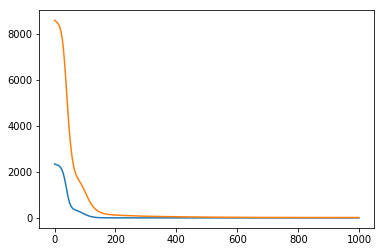

In [126]:
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [116]:
y_pred = model.predict(X)
print('True y:')
print(y[:3])
print()
print('Predicted y:')
print(np.round(y_pred[:3]))  # 四捨五入與真實的y做比較

True y:
[[3]
 [4]
 [5]]

Predicted y:
[[3.]
 [4.]
 [5.]]


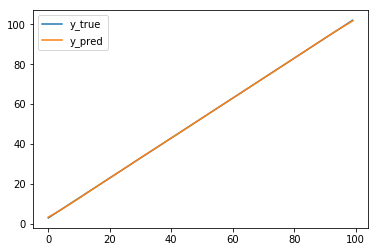

In [117]:
plt.figure()
plt.plot(y.squeeze(), label='y_true')
plt.plot(y_pred.squeeze(), label='y_pred')
plt.legend()
plt.show()

### MLP

In [127]:
model = Sequential()
model.add(Dense(10))
model.add(Dense(10))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X.reshape(-1, 3), y, epochs=1000, batch_size=16, verbose=2, validation_split=0.2)
model.summary()

Train on 80 samples, validate on 20 samples
Epoch 1/1000
 - 2s - loss: 2403.9767 - val_loss: 8804.1988
Epoch 2/1000
 - 0s - loss: 2388.9934 - val_loss: 8752.0615
Epoch 3/1000
 - 0s - loss: 2373.6308 - val_loss: 8700.6836
Epoch 4/1000
 - 0s - loss: 2358.0719 - val_loss: 8650.0148
Epoch 5/1000
 - 0s - loss: 2342.4134 - val_loss: 8600.1643
Epoch 6/1000
 - 0s - loss: 2328.2788 - val_loss: 8549.4902
Epoch 7/1000
 - 0s - loss: 2311.9406 - val_loss: 8500.7098
Epoch 8/1000
 - 0s - loss: 2297.5789 - val_loss: 8450.7277
Epoch 9/1000
 - 0s - loss: 2282.2663 - val_loss: 8400.5262
Epoch 10/1000
 - 0s - loss: 2267.8090 - val_loss: 8348.4961
Epoch 11/1000
 - 0s - loss: 2250.9249 - val_loss: 8297.5844
Epoch 12/1000
 - 0s - loss: 2235.3204 - val_loss: 8244.7186
Epoch 13/1000
 - 0s - loss: 2218.6676 - val_loss: 8190.5422
Epoch 14/1000
 - 0s - loss: 2203.0897 - val_loss: 8132.2793
Epoch 15/1000
 - 0s - loss: 2184.6363 - val_loss: 8072.8752
Epoch 16/1000
 - 0s - loss: 2166.0245 - val_loss: 8010.9006
Epoch

Epoch 141/1000
 - 0s - loss: 37.1331 - val_loss: 109.6718
Epoch 142/1000
 - 0s - loss: 36.6709 - val_loss: 108.4048
Epoch 143/1000
 - 0s - loss: 36.2039 - val_loss: 107.0394
Epoch 144/1000
 - 0s - loss: 35.7629 - val_loss: 105.6553
Epoch 145/1000
 - 0s - loss: 35.3506 - val_loss: 105.1808
Epoch 146/1000
 - 0s - loss: 34.8933 - val_loss: 103.6051
Epoch 147/1000
 - 0s - loss: 34.4791 - val_loss: 101.5564
Epoch 148/1000
 - 0s - loss: 34.0231 - val_loss: 100.5084
Epoch 149/1000
 - 0s - loss: 33.5641 - val_loss: 99.1614
Epoch 150/1000
 - 0s - loss: 33.1600 - val_loss: 97.9524
Epoch 151/1000
 - 0s - loss: 32.7080 - val_loss: 96.4147
Epoch 152/1000
 - 0s - loss: 32.2766 - val_loss: 95.1661
Epoch 153/1000
 - 0s - loss: 31.8762 - val_loss: 93.6735
Epoch 154/1000
 - 0s - loss: 31.4318 - val_loss: 92.3464
Epoch 155/1000
 - 0s - loss: 31.0473 - val_loss: 91.0935
Epoch 156/1000
 - 0s - loss: 30.6159 - val_loss: 89.4401
Epoch 157/1000
 - 0s - loss: 30.1911 - val_loss: 88.7546
Epoch 158/1000
 - 0s - 

 - 0s - loss: 1.7087 - val_loss: 4.5396
Epoch 287/1000
 - 0s - loss: 1.6516 - val_loss: 4.3614
Epoch 288/1000
 - 0s - loss: 1.5999 - val_loss: 4.2489
Epoch 289/1000
 - 0s - loss: 1.5432 - val_loss: 4.0998
Epoch 290/1000
 - 0s - loss: 1.4991 - val_loss: 3.9668
Epoch 291/1000
 - 0s - loss: 1.4479 - val_loss: 3.8158
Epoch 292/1000
 - 0s - loss: 1.3969 - val_loss: 3.7247
Epoch 293/1000
 - 0s - loss: 1.3508 - val_loss: 3.6191
Epoch 294/1000
 - 0s - loss: 1.3048 - val_loss: 3.4811
Epoch 295/1000
 - 0s - loss: 1.2643 - val_loss: 3.3365
Epoch 296/1000
 - 0s - loss: 1.2210 - val_loss: 3.1413
Epoch 297/1000
 - 0s - loss: 1.1793 - val_loss: 3.0473
Epoch 298/1000
 - 0s - loss: 1.1364 - val_loss: 2.9695
Epoch 299/1000
 - 0s - loss: 1.0967 - val_loss: 2.8752
Epoch 300/1000
 - 0s - loss: 1.0594 - val_loss: 2.8170
Epoch 301/1000
 - 0s - loss: 1.0252 - val_loss: 2.7292
Epoch 302/1000
 - 0s - loss: 0.9856 - val_loss: 2.6242
Epoch 303/1000
 - 0s - loss: 0.9555 - val_loss: 2.5151
Epoch 304/1000
 - 0s - lo

Epoch 436/1000
 - 0s - loss: 0.0016 - val_loss: 0.0041
Epoch 437/1000
 - 0s - loss: 0.0015 - val_loss: 0.0038
Epoch 438/1000
 - 0s - loss: 0.0014 - val_loss: 0.0035
Epoch 439/1000
 - 0s - loss: 0.0013 - val_loss: 0.0034
Epoch 440/1000
 - 0s - loss: 0.0013 - val_loss: 0.0032
Epoch 441/1000
 - 0s - loss: 0.0012 - val_loss: 0.0030
Epoch 442/1000
 - 0s - loss: 0.0011 - val_loss: 0.0028
Epoch 443/1000
 - 0s - loss: 0.0010 - val_loss: 0.0026
Epoch 444/1000
 - 0s - loss: 9.8250e-04 - val_loss: 0.0025
Epoch 445/1000
 - 0s - loss: 9.2221e-04 - val_loss: 0.0023
Epoch 446/1000
 - 0s - loss: 8.6756e-04 - val_loss: 0.0022
Epoch 447/1000
 - 0s - loss: 8.1134e-04 - val_loss: 0.0021
Epoch 448/1000
 - 0s - loss: 7.6524e-04 - val_loss: 0.0020
Epoch 449/1000
 - 0s - loss: 7.1449e-04 - val_loss: 0.0018
Epoch 450/1000
 - 0s - loss: 6.7551e-04 - val_loss: 0.0017
Epoch 451/1000
 - 0s - loss: 6.3419e-04 - val_loss: 0.0016
Epoch 452/1000
 - 0s - loss: 5.9282e-04 - val_loss: 0.0015
Epoch 453/1000
 - 0s - loss: 

 - 0s - loss: 9.6080e-08 - val_loss: 2.6060e-07
Epoch 569/1000
 - 0s - loss: 8.8226e-08 - val_loss: 2.3223e-07
Epoch 570/1000
 - 0s - loss: 8.1209e-08 - val_loss: 2.2215e-07
Epoch 571/1000
 - 0s - loss: 7.5116e-08 - val_loss: 2.1461e-07
Epoch 572/1000
 - 0s - loss: 6.9159e-08 - val_loss: 1.9741e-07
Epoch 573/1000
 - 0s - loss: 6.3307e-08 - val_loss: 1.7337e-07
Epoch 574/1000
 - 0s - loss: 5.8341e-08 - val_loss: 1.5198e-07
Epoch 575/1000
 - 0s - loss: 5.3279e-08 - val_loss: 1.4339e-07
Epoch 576/1000
 - 0s - loss: 4.9122e-08 - val_loss: 1.3984e-07
Epoch 577/1000
 - 0s - loss: 4.5783e-08 - val_loss: 1.3057e-07
Epoch 578/1000
 - 0s - loss: 4.2203e-08 - val_loss: 1.2651e-07
Epoch 579/1000
 - 0s - loss: 3.8942e-08 - val_loss: 1.1381e-07
Epoch 580/1000
 - 0s - loss: 3.6037e-08 - val_loss: 1.0821e-07
Epoch 581/1000
 - 0s - loss: 3.3383e-08 - val_loss: 1.0048e-07
Epoch 582/1000
 - 0s - loss: 3.0868e-08 - val_loss: 9.0789e-08
Epoch 583/1000
 - 0s - loss: 2.8926e-08 - val_loss: 8.7186e-08
Epoch 5

Epoch 699/1000
 - 0s - loss: 2.3949e-10 - val_loss: 1.0070e-09
Epoch 700/1000
 - 0s - loss: 2.3580e-10 - val_loss: 1.0128e-09
Epoch 701/1000
 - 0s - loss: 2.4160e-10 - val_loss: 9.8953e-10
Epoch 702/1000
 - 0s - loss: 2.3298e-10 - val_loss: 9.3714e-10
Epoch 703/1000
 - 0s - loss: 2.2246e-10 - val_loss: 9.4587e-10
Epoch 704/1000
 - 0s - loss: 2.1929e-10 - val_loss: 8.9931e-10
Epoch 705/1000
 - 0s - loss: 2.1458e-10 - val_loss: 8.9931e-10
Epoch 706/1000
 - 0s - loss: 2.1164e-10 - val_loss: 8.6438e-10
Epoch 707/1000
 - 0s - loss: 2.1915e-10 - val_loss: 8.1782e-10
Epoch 708/1000
 - 0s - loss: 2.1256e-10 - val_loss: 8.1782e-10
Epoch 709/1000
 - 0s - loss: 2.0158e-10 - val_loss: 7.9744e-10
Epoch 710/1000
 - 0s - loss: 2.0610e-10 - val_loss: 7.7707e-10
Epoch 711/1000
 - 0s - loss: 1.9745e-10 - val_loss: 7.7707e-10
Epoch 712/1000
 - 0s - loss: 1.9124e-10 - val_loss: 7.7707e-10
Epoch 713/1000
 - 0s - loss: 1.8465e-10 - val_loss: 7.3051e-10
Epoch 714/1000
 - 0s - loss: 1.8910e-10 - val_loss: 7.3

Epoch 830/1000
 - 0s - loss: 3.2538e-11 - val_loss: 1.7462e-10
Epoch 831/1000
 - 0s - loss: 3.1847e-11 - val_loss: 1.7462e-10
Epoch 832/1000
 - 0s - loss: 3.0303e-11 - val_loss: 1.7462e-10
Epoch 833/1000
 - 0s - loss: 3.0003e-11 - val_loss: 1.7462e-10
Epoch 834/1000
 - 0s - loss: 2.8817e-11 - val_loss: 1.6007e-10
Epoch 835/1000
 - 0s - loss: 2.8999e-11 - val_loss: 1.8044e-10
Epoch 836/1000
 - 0s - loss: 2.9545e-11 - val_loss: 1.8044e-10
Epoch 837/1000
 - 0s - loss: 3.0224e-11 - val_loss: 1.7171e-10
Epoch 838/1000
 - 0s - loss: 2.9871e-11 - val_loss: 1.4843e-10
Epoch 839/1000
 - 0s - loss: 2.7553e-11 - val_loss: 1.4843e-10
Epoch 840/1000
 - 0s - loss: 2.6507e-11 - val_loss: 1.3970e-10
Epoch 841/1000
 - 0s - loss: 2.6507e-11 - val_loss: 1.3097e-10
Epoch 842/1000
 - 0s - loss: 2.6134e-11 - val_loss: 1.3097e-10
Epoch 843/1000
 - 0s - loss: 2.6100e-11 - val_loss: 1.3097e-10
Epoch 844/1000
 - 0s - loss: 2.5872e-11 - val_loss: 1.3097e-10
Epoch 845/1000
 - 0s - loss: 2.5884e-11 - val_loss: 1.3

Epoch 961/1000
 - 0s - loss: 1.5206e-11 - val_loss: 4.6566e-11
Epoch 962/1000
 - 0s - loss: 1.5206e-11 - val_loss: 4.6566e-11
Epoch 963/1000
 - 0s - loss: 1.5174e-11 - val_loss: 4.6566e-11
Epoch 964/1000
 - 0s - loss: 1.4447e-11 - val_loss: 4.6566e-11
Epoch 965/1000
 - 0s - loss: 1.4447e-11 - val_loss: 4.6566e-11
Epoch 966/1000
 - 0s - loss: 1.4447e-11 - val_loss: 4.6566e-11
Epoch 967/1000
 - 0s - loss: 1.4447e-11 - val_loss: 4.6566e-11
Epoch 968/1000
 - 0s - loss: 1.4447e-11 - val_loss: 4.6566e-11
Epoch 969/1000
 - 0s - loss: 1.4430e-11 - val_loss: 4.6566e-11
Epoch 970/1000
 - 0s - loss: 1.4405e-11 - val_loss: 4.6566e-11
Epoch 971/1000
 - 0s - loss: 1.4405e-11 - val_loss: 4.6566e-11
Epoch 972/1000
 - 0s - loss: 1.4405e-11 - val_loss: 4.6566e-11
Epoch 973/1000
 - 0s - loss: 1.4325e-11 - val_loss: 4.6566e-11
Epoch 974/1000
 - 0s - loss: 1.4325e-11 - val_loss: 4.6566e-11
Epoch 975/1000
 - 0s - loss: 1.4385e-11 - val_loss: 4.6566e-11
Epoch 976/1000
 - 0s - loss: 1.4385e-11 - val_loss: 4.6

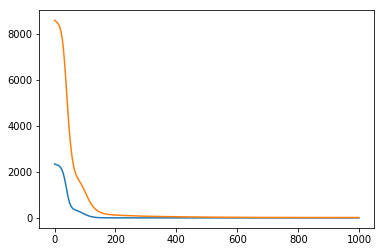

In [128]:
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [121]:
y_pred = model.predict(X.reshape(-1, 3))
print('True y:')
print(y[:3])
print()
print('Predicted y:')
print(np.round(y_pred[:3]))  # 四捨五入與真實的y做比較

True y:
[[3]
 [4]
 [5]]

Predicted y:
[[3.]
 [4.]
 [5.]]


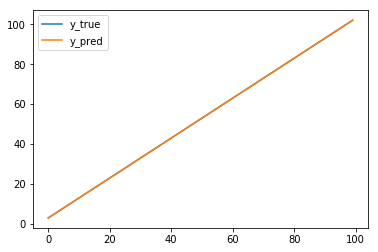

In [122]:
plt.figure()
plt.plot(y.squeeze(), label='y_true')
plt.plot(y_pred.squeeze(), label='y_pred')
plt.legend()
plt.show()